In [123]:
import sqlite3
import pandas as pd
import seaborn as sns  #visualisation
import matplotlib.pyplot as plt  #visualisation

#matplotlib inline     
sns.set_theme(color_codes=True)

In [124]:
# Sample DataFrame
data = {
    "Name": ["Alice", "Bob", "Charlie"],
    "Age": [24, 27, 22],
    "City": ["New York", "Los Angeles", "Chicago"]
}
df = pd.DataFrame(data)

# Connect to SQLite database (or create it if it doesn't exist)
conn = sqlite3.connect("example.db")

# Save DataFrame to SQLite table
df.to_sql("people", conn, if_exists="replace", index=False)

# Close the connection
conn.close()

print("Data saved to SQLite database!")

Data saved to SQLite database!


### Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [125]:
fsq = pd.read_csv("../data/fsq_for_EDA.csv")
# print(fsq.head(1))
fsq = fsq[['name', 'distance', 'rating', 'price']]
# print(fsq.head(1))
# fsq.head()

In [126]:
yelp = pd.read_csv("../data/yelp_for_EDA.csv")
# print(yelp.head(1))
yelp = yelp[['name', 'distance', 'rating', 'price']]
# print(yelp.head(1))
yelp['price'].unique()
yelp['price'] = yelp['price'].apply(lambda x: float(len(x)))
yelp['distance'] = yelp['distance'].apply(lambda x: int(x))
# yelp.head()

In [127]:
# Join 2 DataFrames 
df = pd.concat([fsq, yelp], ignore_index=True)
# Save DataFrame to CSV file
df.to_csv("../data/data_for_EDA.csv")

### Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

Duplicate columns: []
Duplicate index: []


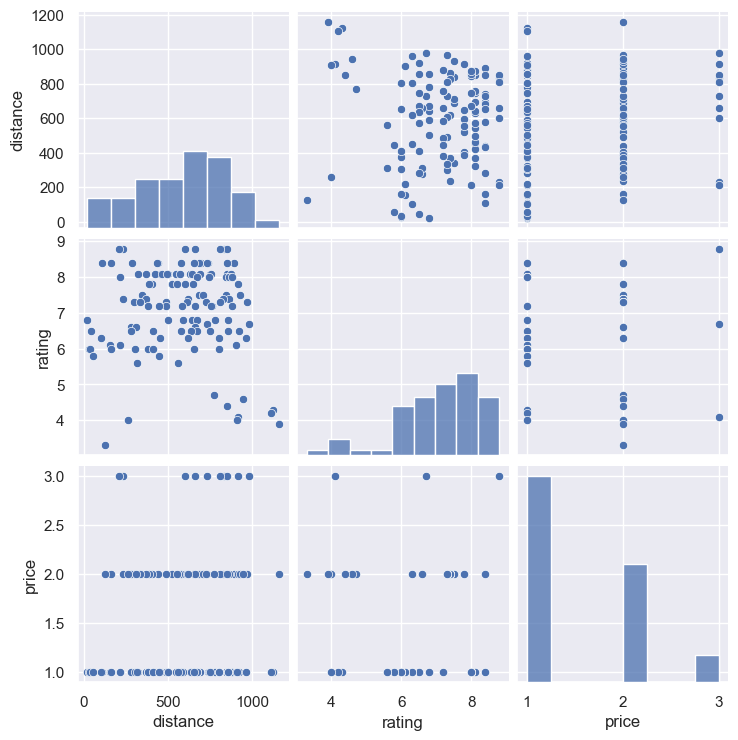

In [128]:
# Identify duplicate column labels
duplicates = df.columns[df.columns.duplicated()]
print(f"Duplicate columns: {duplicates.tolist()}")
# Identify duplicate index labels
duplicates = df.index[df.index.duplicated()]
print(f"Duplicate index: {duplicates.tolist()}")
tmp = df.drop_duplicates(inplace=False)
tmp = tmp.dropna(inplace=False)
sns.pairplot(data=tmp)
plt.show()

# Database

### Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [129]:
# Connect to SQLite database (or create it if it doesn't exist)
conn = sqlite3.connect('../data/api.db')

# Get city bikes info from CSV file
city_bikes = pd.read_csv("../data/city_bikes.csv")

# Save DataFrames to SQLite table
city_bikes.to_sql('city_bikes', conn, if_exists='replace', index=False)
df.to_sql('fsq_yelp_search', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

print('Data saved to SQLite database!')

Data saved to SQLite database!


### Look at the data before and after the join to validate your data.

In [130]:
print(f'FourSquare DataFrame shape {fsq.shape}')
print(f'Yelp DataFrame shape {yelp.shape}')
print(f'DataFrame after joining fsq & yelp {df.shape}')

FourSquare DataFrame shape (768, 4)
Yelp DataFrame shape (22, 4)
DataFrame after joining fsq & yelp (790, 4)
